In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import requests
from urllib.request import Request, urlopen
pd.options.display.max_rows = 1500
pd.options.display.max_columns = 1500
%matplotlib inline

In [2]:
cnn = pd.read_csv('../data/cnn.csv')

In [3]:
cnn.head()

,PMID,Title,ISOAbbreviation,journal_title,Abstract,Journalinfo_country,Published_year,Keyword_list,publication_type,medline_citation,pubmed_year,Affiliation,Rank,Sourceid,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2018),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Coverage,Categories
0,31710775,The Use of Optical Coherence Tomography and Co...,J Biophotonics,Journal Of Biophotonics,Incomplete surgical resection of head and neck...,Germany,2019,"head and neck neoplasms,margins of excision,op...",Journal Article,Publisher,2019,"Beckman Laser Institute & Medical Clinic, Irvi...",4132.0,1.640015e+10,journal,1864063X,1.039,Q1,56.0,337.0,416.0,13424.0,1428.0,371.0,"3,84","39,83",Germany,Wiley - VCH Verlag GmbH & CO. KGaA,2008-ongoing,"Biochemistry, Genetics and Molecular Biology (..."
1,31710668,Automatic extraction of cancer registry report...,J Am Med Inform Assoc,Journal Of The American Medical Informatics As...,We implement 2 different multitask learning (M...,England,2019,"cancer pathology reports,convolutional neural ...",Journal Article,Publisher,2019,Computational Sciences and Engineering Divisio...,1802.0,2.360000e+04,journal,10675027,1.711,Q1,132.0,225.0,557.0,8084.0,2430.0,518.0,"4,46","35,93",United States,Oxford University Press,1994-ongoing,Health Informatics (Q1)
2,31710212,Convolutional neural networks for the design a...,J Chem Inf Model,Journal Of Chemical Information And Modeling,Convolutional neural network (CNN) is employed...,United States,2019,NaN,Journal Article,Publisher,2019,NaN,2406.0,1.300800e+05,journal,"1549960X, 15499596",1.446,Q1,142.0,240.0,763.0,13356.0,3259.0,748.0,"4,04","55,65",United States,American Chemical Society,2005-ongoing,Chemical Engineering (miscellaneous) (Q1); Che...
3,31708729,Deep Learning-Based Deep Brain Stimulation Tar...,Front Neurosci,Frontiers In Neuroscience,The purpose of the present study was to evalua...,Switzerland,2019,"clinical application,convolutional neural netw...",Journal Article,PubMed-not-MEDLINE,2019,"Department of Neurosurgery, Seoul Metropolitan...",1891.0,2.110020e+10,journal,"1662453X, 16624548",1.665,Q1,71.0,810.0,1884.0,59190.0,7496.0,1766.0,"3,81","73,07",Switzerland,Frontiers Media S.A.,2011-ongoing,Neuroscience (miscellaneous) (Q1)
4,31708281,Estimating PM2.5 concentration of the contermi...,Environ. Pollut.,Environmental Pollution,We apply convolutional neural network (CNN) mo...,England,2019,"Convolutional neural network (CNN),Deep learni...",Journal Article,Publisher,2019,Department of Electrical and Computer Engineer...,1873.0,2.391600e+04,journal,"02697491, 18736424",1.673,Q1,194.0,1493.0,2547.0,86792.0,15198.0,2505.0,"5,95","58,13",United Kingdom,Elsevier Ltd.,"1970-1980, 1986-ongoing","Health, Toxicology and Mutagenesis (Q1); Medic..."


In [4]:
cnn.isnull().sum()

PMID                         0
Title                        0
ISOAbbreviation              0
journal_title                0
Abstract                    23
Journalinfo_country          0
Published_year               0
Keyword_list              1914
publication_type             0
medline_citation             0
pubmed_year                  0
Affiliation                948
Rank                      1009
Sourceid                  1009
Type                      1009
Issn                      1009
SJR                       1009
SJR Best Quartile         1009
H index                   1009
Total Docs. (2018)        1009
Total Docs. (3years)      1009
Total Refs.               1009
Total Cites (3years)      1009
Citable Docs. (3years)    1009
Cites / Doc. (2years)     1009
Ref. / Doc.               1009
Country                   1009
Publisher                 1015
Coverage                  1009
Categories                1009
dtype: int64

In [5]:
# missing =final_df.columns[final_df.isna().any()]
# display(final_df[final_df["Abstract"].isnull()][missing])
# missing

In [6]:
cnn.publication_type.value_counts(dropna= False)

Journal Article                                            4012
Review                                                       82
Comparative Study                                            30
Validation Studies                                           29
Evaluation Studies                                           28
Multicenter Study                                             7
Published Erratum                                             7
Comparative Study,Evaluation Studies                          7
Letter                                                        5
English Abstract                                              5
Clinical Trial                                                4
Comparative Study,Validation Studies                          4
Comparative Study,Evaluation Studies,Validation Studies       3
Systematic Review                                             3
Editorial                                                     3
Video-Audio Media                       

In [7]:
missing =cnn.columns[cnn.isna().any()]
display(cnn[cnn["PMID"].isnull()][missing])
missing

,Abstract,Keyword_list,Affiliation,Rank,Sourceid,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2018),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Coverage,Categories


Index(['Abstract', 'Keyword_list', 'Affiliation', 'Rank', 'Sourceid', 'Type',
       'Issn', 'SJR', 'SJR Best Quartile', 'H index', 'Total Docs. (2018)',
       'Total Docs. (3years)', 'Total Refs.', 'Total Cites (3years)',
       'Citable Docs. (3years)', 'Cites / Doc. (2years)', 'Ref. / Doc.',
       'Country', 'Publisher', 'Coverage', 'Categories'],
      dtype='object')

In [8]:
#final_df[final_df.ISOAbbreviation=='IEEE Trans Med Imaging']

## Analysis manuscript without review articles

In [9]:
minus_reviews =cnn[~cnn.publication_type.str.contains("Review|Comment|Editorial|Letter|Published Erratum")==True]
minus_reviews.publication_type.value_counts()

Journal Article                                            4012
Comparative Study                                            30
Validation Studies                                           29
Evaluation Studies                                           28
Comparative Study,Evaluation Studies                          7
Multicenter Study                                             7
English Abstract                                              5
Clinical Trial                                                4
Comparative Study,Validation Studies                          4
Comparative Study,Evaluation Studies,Validation Studies       3
Video-Audio Media                                             3
Observational Study                                           2
Dataset                                                       2
Randomized Controlled Trial                                   2
Retraction of Publication                                     2
Clinical Trial,Multicenter Study        

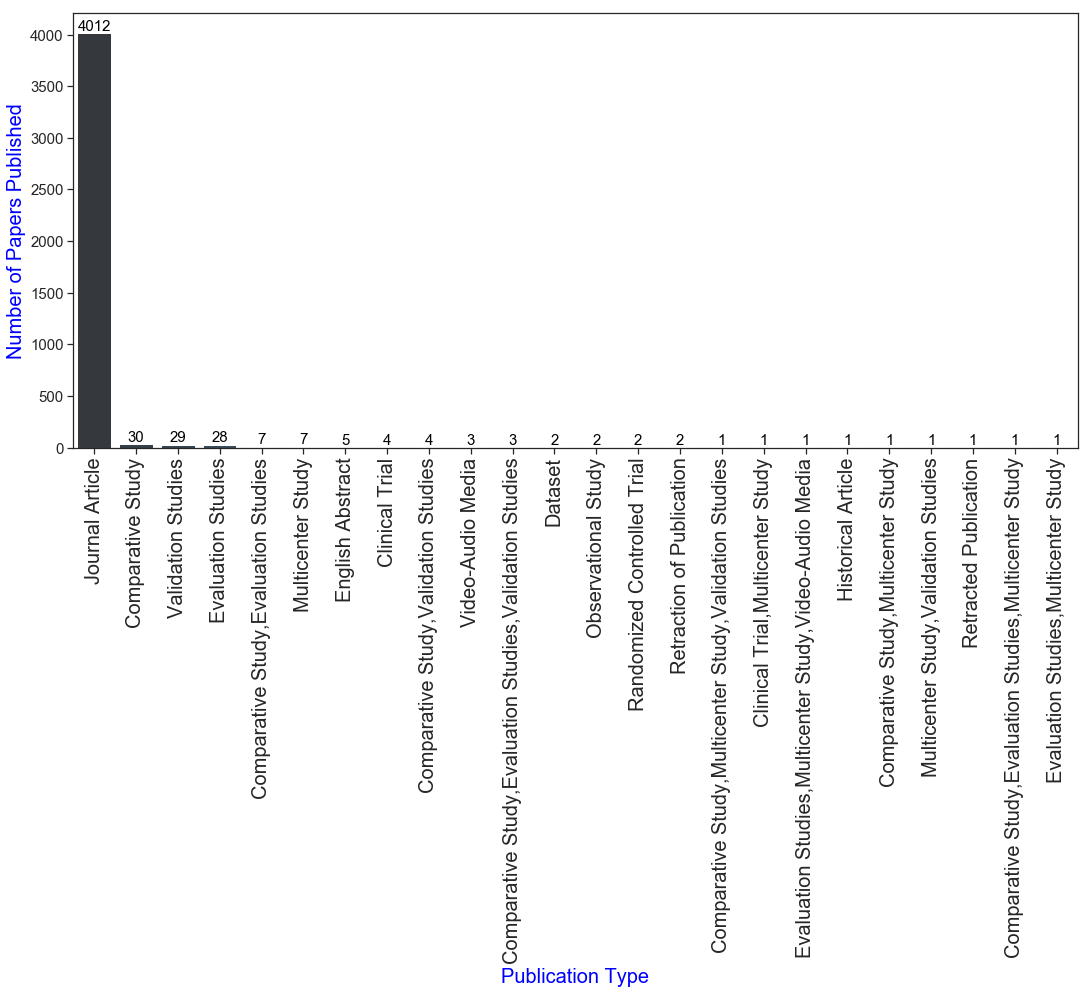

In [10]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")
publication_type = minus_reviews.groupby('publication_type')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True).head(30)
ax =sns.barplot(x = 'publication_type', y = 'PMID', data = publication_type, palette ="Blues_d")
plt.xlabel('Publication Type',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in publication_type.iterrows():
    ax.text(row.name,row.PMID, round(row.PMID),color='black', ha="center",fontsize = 15, va='bottom')#, clip_on= True);


In [11]:
num_published_year= minus_reviews.groupby('Published_year')['PMID'].count().reset_index()\
                        .sort_values('Published_year', ascending =False)\

num_published_year

,Published_year,PMID
21,2020,7
20,2019,2107
19,2018,1302
18,2017,512
17,2016,138
16,2015,47
15,2014,8
14,2013,6
13,2012,3
12,2011,1


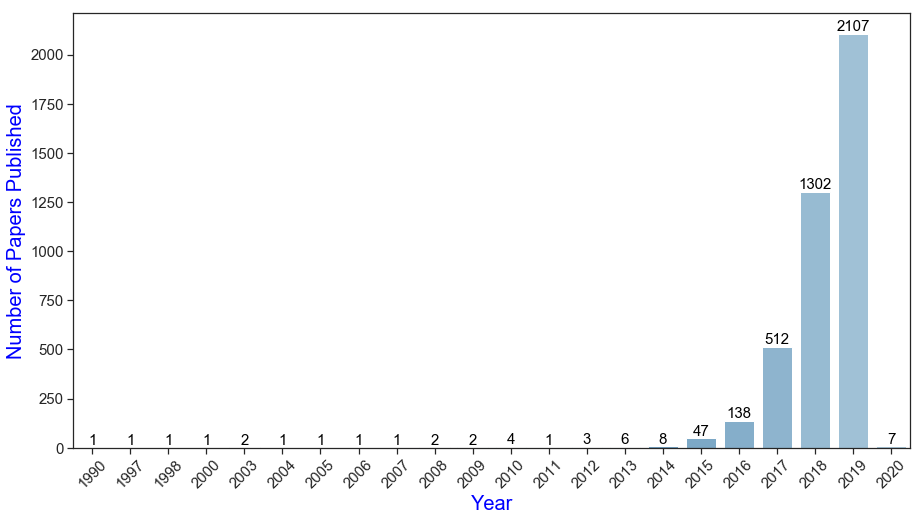

In [12]:
sns.set(rc={'figure.figsize':(15,8)}, style ='white' )
sns.set_style("ticks")
num_published_year= minus_reviews.groupby('Published_year')['PMID'].count().reset_index()\
                        .sort_values('Published_year', ascending =False)
g =sns.barplot(x = 'Published_year', y = 'PMID', data = num_published_year, palette ="Blues_d")
plt.xlabel('Year',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
for index, row in num_published_year.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 15, va='bottom');

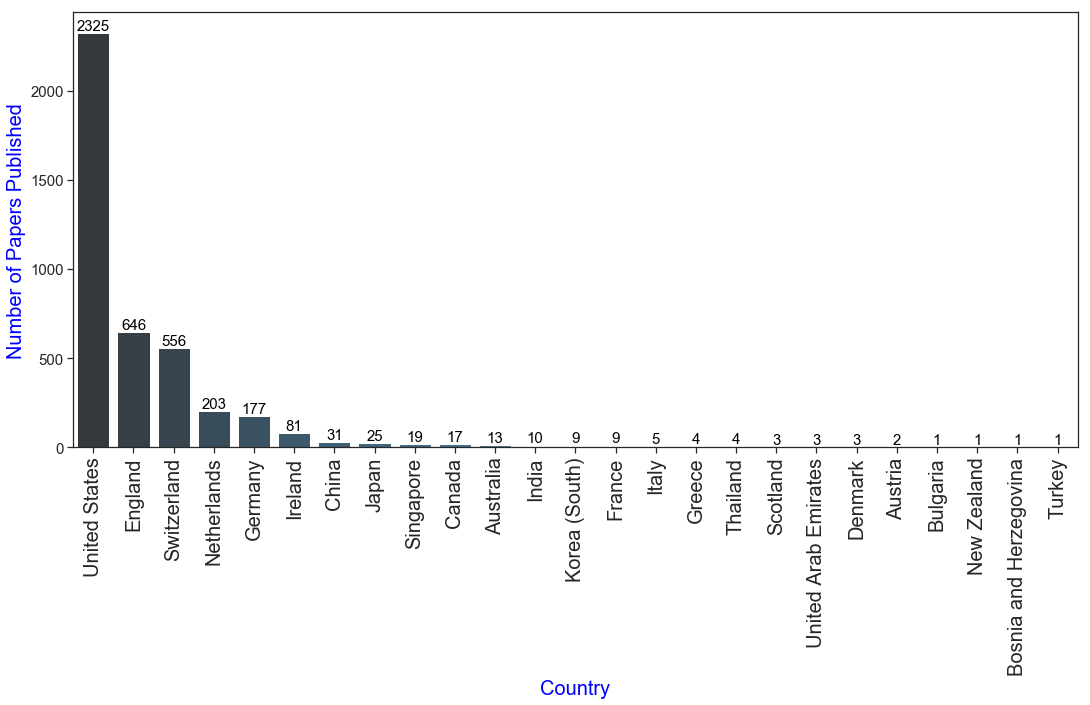

In [13]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
num_published_country= minus_reviews.groupby('Journalinfo_country')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True)\

g =sns.barplot(x = 'Journalinfo_country', y = 'PMID', data = num_published_country, palette ="Blues_d")
plt.xlabel('Country',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in num_published_country.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 15, va='bottom');

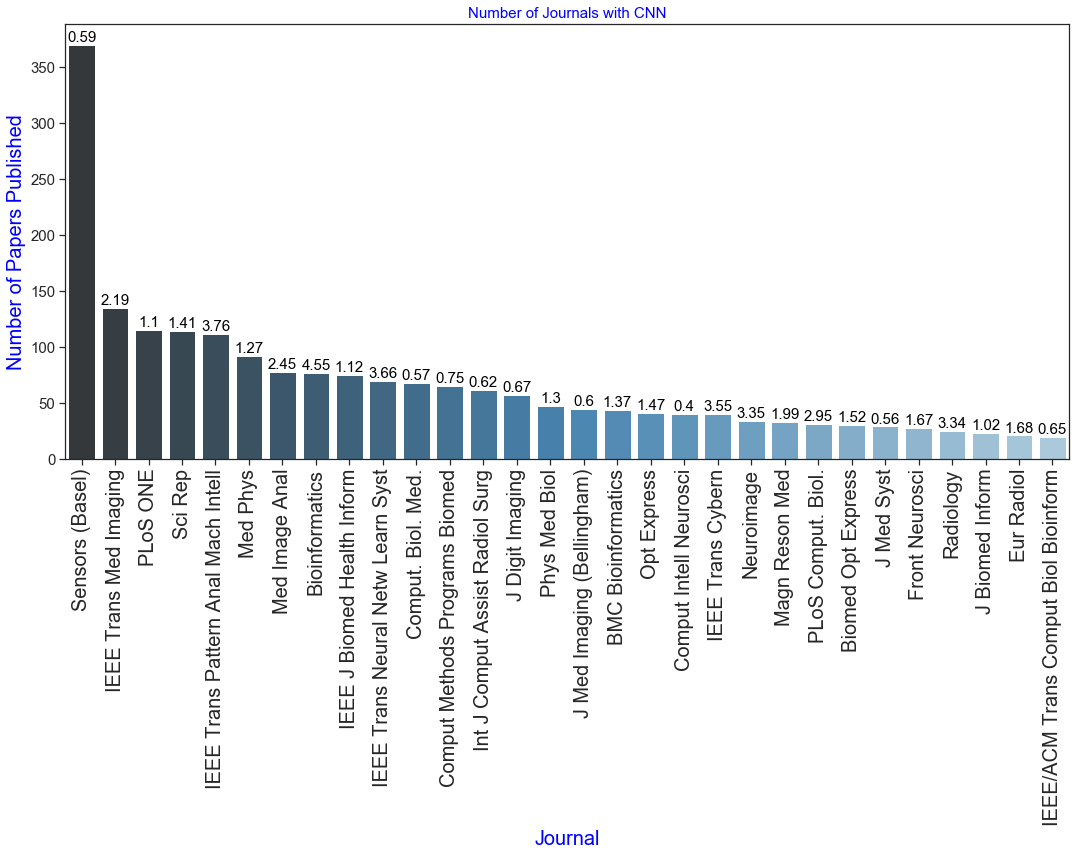

In [14]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")

total_published=  minus_reviews.groupby(['ISOAbbreviation', 'SJR'])[['PMID']].count()\
    .reset_index().sort_values('PMID', ascending = False).reset_index(drop= True).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'PMID', data = total_published, palette ="Blues_d")
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Number of Journals with CNN', fontsize = 15, color = 'blue')

for index, row in total_published.iterrows():
    g.text(row.name,row.PMID, round(row.SJR,2),color='black', ha="center", fontsize = 15, va='bottom');

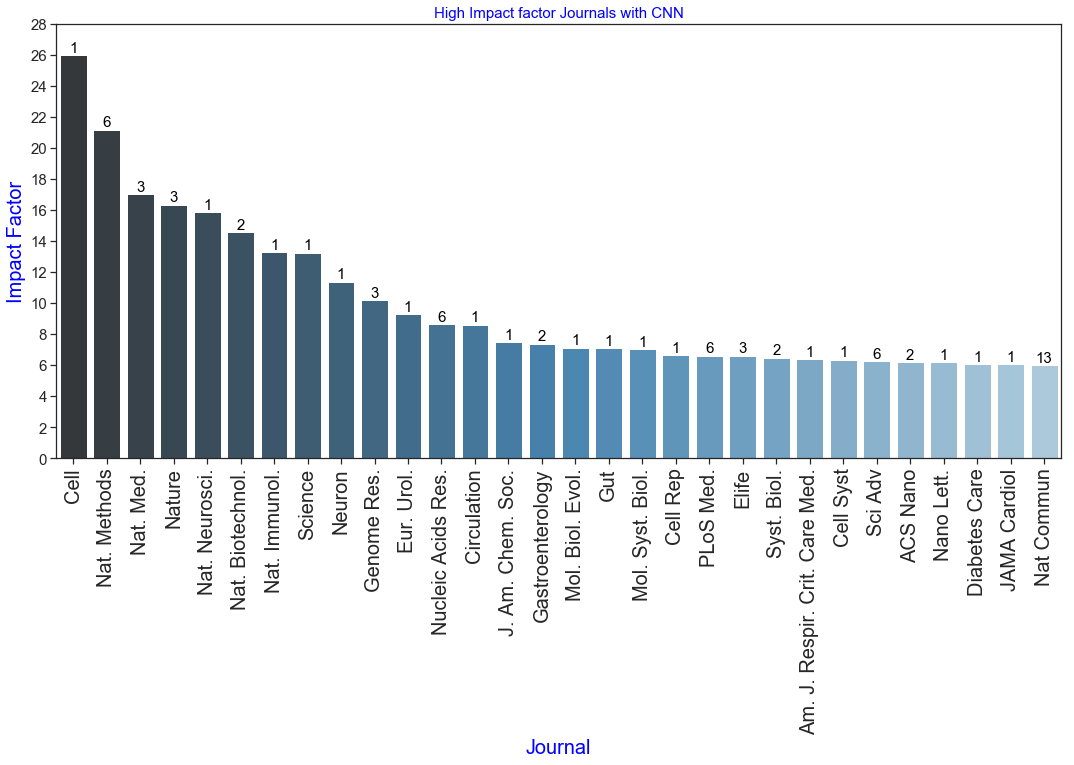

In [15]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")

highimpact_journal= minus_reviews.groupby(['ISOAbbreviation','SJR'])['PMID'].count().reset_index()\
                        .sort_values('SJR', ascending =False).reset_index(drop= True).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'SJR', data = highimpact_journal, palette ="Blues_d")
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Impact Factor',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(range(0, 30, 2),fontsize = 15)
plt.title('High Impact factor Journals with CNN', fontsize = 15, color = 'blue')

for index, row in highimpact_journal.iterrows():
    g.text(row.name,row.SJR, round(row.PMID,1),color='black', ha="center", fontsize = 15, va='bottom');